In [61]:
library(plyr)
library(ggplot2)
nested = read.csv("/Users/chrisgraves/Documents/Yeast_data/mortality_variation/variation_in_mortality_12142015.csv",header=T)
nested

,Strain,Growth.Rep,Plate.Rep,No.HS.dil,No.HS.vol,No.HS.count,No.HS.dens,HS.dil,HS.vol,HS.count,HS.dens,Mortality,NOTES
1,H1,A,A,10000,50,216,43200000,1000,50,99,1980000,0.9541667,
2,H1,A,B,10000,50,218,43600000,1000,50,155,3100000,0.9288991,HS PLATE LABELED H1-A1
3,H1,B,A,10000,50,198,39600000,1000,50,90,1800000,0.9545455,
4,H1,B,B,10000,50,164,32800000,1000,50,116,2320000,0.9292683,
5,H3,A,A,10000,50,168,33600000,1000,50,417,8340000,0.7517857,
6,H3,A,B,10000,50,198,39600000,1000,50,197,3940000,0.9005051,
7,H3,B,A,10000,50,201,40200000,1000,50,194,3880000,0.9034826,
8,H3,B,B,10000,50,258,51600000,1000,50,141,2820000,0.9453488,
9,H5,A,A,10000,50,246,49200000,1000,50,416,8320000,0.8308943,
10,H5,A,B,10000,50,139,27800000,1000,50,92,1840000,0.9338129,


In [65]:
#add error bars 
nested$SE = sqrt((1/nested$No.HS.count)+(1/nested$HS.count))
nested$mort_upper = 1-exp(log(nested$HS.count/nested$No.HS.count)+qnorm(.975)*nested$SE)*((nested$No.HS.vol*nested$HS.dil)/(nested$HS.vol*nested$No.HS.dil))
nested$mort_lower = 1-exp(log(nested$HS.count/nested$No.HS.count)+qnorm(.025)*nested$SE)*((nested$No.HS.vol*nested$HS.dil)/(nested$HS.vol*nested$No.HS.dil))
nested=rename(nested,c("Growth.Rep"="Flask_rep","Plate.Rep"="Heat_shock_rep"))

nested


,Strain,Flask_rep,Heat_shock_rep,No.HS.dil,No.HS.vol,No.HS.count,No.HS.dens,HS.dil,HS.vol,HS.count,HS.dens,Mortality,NOTES,SE,mort_upper,mort_lower
1,H1,A,A,10000,50,216,43200000,1000,50,99,1980000,0.9541667,,0.1213698,0.9418578,0.9638697
2,H1,A,B,10000,50,218,43600000,1000,50,155,3100000,0.9288991,HS PLATE LABELED H1-A1,0.1050655,0.9126411,0.9421314
3,H1,B,A,10000,50,198,39600000,1000,50,90,1800000,0.9545455,,0.1271283,0.9416838,0.9645705
4,H1,B,B,10000,50,164,32800000,1000,50,116,2320000,0.9292683,,0.1213188,0.9102817,0.9442368
5,H3,A,A,10000,50,168,33600000,1000,50,417,8340000,0.7517857,,0.09138086,0.7030999,0.792488
6,H3,A,B,10000,50,198,39600000,1000,50,197,3940000,0.9005051,,0.1006312,0.8788123,0.9183148
7,H3,B,A,10000,50,201,40200000,1000,50,194,3880000,0.9034826,,0.1006467,0.8824355,0.9207617
8,H3,B,B,10000,50,258,51600000,1000,50,141,2820000,0.9453488,,0.104729,0.9328965,0.9554904
9,H5,A,A,10000,50,246,49200000,1000,50,416,8320000,0.8308943,,0.08042939,0.8020207,0.855557
10,H5,A,B,10000,50,139,27800000,1000,50,92,1840000,0.9338129,,0.1344017,0.9138657,0.9491407


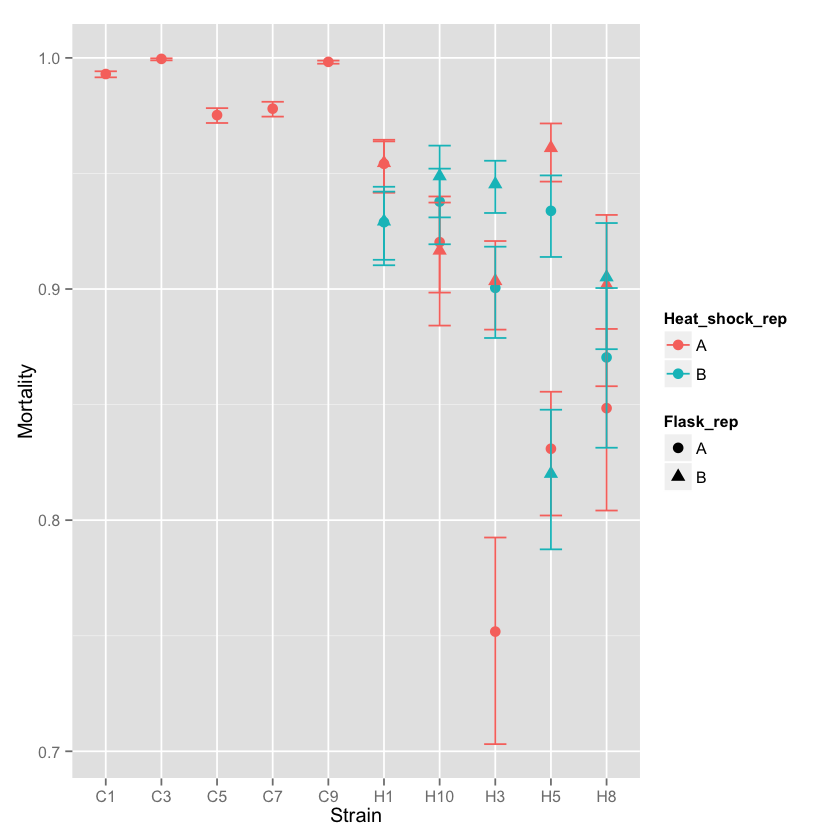

In [66]:
limits = aes(ymax=mort_upper,ymin=mort_lower)
mort_plot = ggplot(nested,aes(x=Strain,y=Mortality,colour=Heat_shock_rep,shape=Flask_rep))+
    geom_point(size=3)+
    geom_errorbar(limits,width=.4)
mort_plot

In [73]:
#Partition sum of squares within each level of replication
within_HS = ddply(nested,~Strain*Heat_shock_rep,N=length(Mortality),summarise,mean_mort = mean(Mortality),HS_var = var(Mortality),SS_HS = sum((Mortality-mean(Mortality))^2))
within_HS

within_growth = ddply(within_HS,~Strain,N=length(mean_mort),summarise,mean_mort2 = mean(mean_mort),flask_var = var(mean_mort),SS_flask = sum((mean_mort-mean(mean_mort))^2))
within_growth

within_strain = ddply(nested,~Strain,N=length(Mortality),summarise,mean_mort = mean(Mortality),flask_var = var(Mortality),SS_tot= sum((Mortality-mean(Mortality))^2))
within_strain

c("SS_heat_shock"=mean(within_HS$SS_HS[which(within_HS$SS_HS!=0)]),"SS_flask"=mean(within_growth$SS_flask[which(within_growth$SS_flask!=0)]),"SS_strain"=mean(within_strain$SS_tot[which(within_strain$SS_tot!=0)]))

,Strain,Heat_shock_rep,N,mean_mort,HS_var,SS_HS
1,C1,A,1,0.9930112,NA,0
2,C3,A,1,0.9995614,NA,0
3,C5,A,1,0.9752484,NA,0
4,C7,A,1,0.9780303,NA,0
5,C9,A,1,0.9982778,NA,0
6,H1,A,2,0.9543561,7.174017e-08,7.174017e-08
7,H1,B,2,0.9290837,6.815801e-08,6.815801e-08
8,H10,A,2,0.9184685,6.492977e-06,6.492977e-06
9,H10,B,2,0.9433284,6.029184e-05,6.029184e-05
10,H3,A,2,0.8276342,0.01150597,0.01150597


,Strain,N,mean_mort2,flask_var,SS_flask
1,C1,1,0.9930112,NA,0
2,C3,1,0.9995614,NA,0
3,C5,1,0.9752484,NA,0
4,C7,1,0.9780303,NA,0
5,C9,1,0.9982778,NA,0
6,H1,2,0.9417199,0.0003193464,0.0003193464
7,H10,2,0.9308984,0.0003090073,0.0003090073
8,H3,2,0.8752805,0.004540358,0.004540358
9,H5,2,0.8864575,0.0001806645,0.0001806645
10,H8,2,0.8814295,8.002523e-05,8.002523e-05


,Strain,N,mean_mort,flask_var,SS_tot
1,C1,1,0.9930112,NA,0
2,C3,1,0.9995614,NA,0
3,C5,1,0.9752484,NA,0
4,C7,1,0.9780303,NA,0
5,C9,1,0.9982778,NA,0
6,H1,4,0.9417199,0.0002129442,0.0006388327
7,H10,4,0.9308984,0.0002282665,0.0006847994
8,H3,4,0.8752805,0.00719739,0.02159217
9,H5,4,0.8864575,0.005098321,0.01529496
10,H8,4,0.8814295,0.0007274565,0.00218237


SS_heat_shock      SS_flask     SS_strain 
  0.002953433   0.001085880   0.008078627